In [404]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [455]:
df = pd.read_csv("hawaii.csv")


In [457]:
df.columns

Index(['loan_type', 'property_type', 'purpose', 'occupancy', 'amount',
       'status', 'sex', 'income'],
      dtype='object')

**Check the head of the dataframe.**

In [406]:
df.head()

,loan_type,property_type,purpose,occupancy,amount,status,sex,income
0,Conventional,One-to-four family dwelling (other than manufa...,Home purchase,Owner-occupied as a principal dwelling,396,Loan originated,Female,152.0
1,VA-guaranteed,One-to-four family dwelling (other than manufa...,Home purchase,Owner-occupied as a principal dwelling,662,Loan originated,Male,111.0
2,Conventional,One-to-four family dwelling (other than manufa...,Home purchase,Owner-occupied as a principal dwelling,461,Loan originated,Female,138.0
3,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Not owner-occupied as a principal dwelling,345,Loan originated,Female,184.0
4,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Not owner-occupied as a principal dwelling,210,Application withdrawn by applicant,Female,99.0


In [407]:
df.columns

Index(['loan_type', 'property_type', 'purpose', 'occupancy', 'amount',
       'status', 'sex', 'income'],
      dtype='object')

# EDA

In [408]:
# Remove null values
df = df.dropna()

### Status

In [409]:
# Keep only records that either granted or rejected loans
states = ['originated', 'approved', 'denied']
df = df[df.apply(lambda x: any(s in x.status for s in states), axis=1)]

In [410]:
df.status.value_counts()

Loan originated                                25429
Application denied by financial institution     5321
Application approved but not accepted           1164
Name: status, dtype: int64

In [411]:
# Merged approved and withdrawn in row status
def f(row):
    return 1 if ("approved" in row.status or "originated" in row.status) else 0
df['status'] = df.apply(f, axis=1)


In [412]:
df['status'].unique()

array([1, 0])

In [413]:
# Making sure the counts added up
df.status.value_counts()

1    26593
0     5321
Name: status, dtype: int64

# Encode Categorical Features

In [414]:
df.dtypes

loan_type         object
property_type     object
purpose           object
occupancy         object
amount             int64
status             int64
sex               object
income           float64
dtype: object

In [415]:
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(df)
categorical_columns
df = pd.get_dummies(df, columns=categorical_columns)
df.head()


,amount,status,income,loan_type_Conventional,loan_type_FHA-insured,loan_type_FSA/RHS-guaranteed,loan_type_VA-guaranteed,property_type_Manufactured housing,property_type_One-to-four family dwelling (other than manufactured housing),purpose_Home improvement,purpose_Home purchase,purpose_Refinancing,occupancy_Not applicable,occupancy_Not owner-occupied as a principal dwelling,occupancy_Owner-occupied as a principal dwelling,sex_Female,"sex_Information not provided by applicant in mail, Internet, or telephone application",sex_Male,sex_Not applicable
0,396,1,152.0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0
1,662,1,111.0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0
2,461,1,138.0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0
3,345,1,184.0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0
5,563,0,116.0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0


In [416]:
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(df)

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [417]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [418]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [419]:
scaler.fit(df.drop('status', axis=1))

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [420]:
scaled_features = scaler.transform(df.drop('status', axis=1))


**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [421]:
df_features = pd.DataFrame(scaled_features, columns=[col for col in df.columns if col != 'status'])
df_features.head()


,amount,income,loan_type_Conventional,loan_type_FHA-insured,loan_type_FSA/RHS-guaranteed,loan_type_VA-guaranteed,property_type_Manufactured housing,property_type_One-to-four family dwelling (other than manufactured housing),purpose_Home improvement,purpose_Home purchase,purpose_Refinancing,occupancy_Not applicable,occupancy_Not owner-occupied as a principal dwelling,occupancy_Owner-occupied as a principal dwelling,sex_Female,"sex_Information not provided by applicant in mail, Internet, or telephone application",sex_Male,sex_Not applicable
0,-0.103112,-0.000361,0.542269,-0.243764,-0.140987,-0.422811,-0.012518,0.012518,-0.341205,1.013883,-0.820949,-0.020187,-0.474205,0.474849,1.738807,-0.321044,-1.384624,-0.028554
1,0.690162,-0.064687,-1.844103,-0.243764,-0.140987,2.365122,-0.012518,0.012518,-0.341205,1.013883,-0.820949,-0.020187,-0.474205,0.474849,-0.575107,-0.321044,0.722218,-0.028554
2,0.090733,-0.022326,0.542269,-0.243764,-0.140987,-0.422811,-0.012518,0.012518,-0.341205,1.013883,-0.820949,-0.020187,-0.474205,0.474849,1.738807,-0.321044,-1.384624,-0.028554
3,-0.255206,0.049844,0.542269,-0.243764,-0.140987,-0.422811,-0.012518,0.012518,-0.341205,-0.986307,1.218102,-0.020187,2.108792,-2.105931,1.738807,-0.321044,-1.384624,-0.028554
4,0.394921,-0.056843,-1.844103,-0.243764,-0.140987,2.365122,-0.012518,0.012518,-0.341205,-0.986307,1.218102,-0.020187,-0.474205,0.474849,-0.575107,-0.321044,0.722218,-0.028554


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [422]:
from sklearn.model_selection import train_test_split

In [423]:
X_train, X_test, y_train, y_test = train_test_split(
    df_features, df['status'], test_size=0.3, random_state=101)


# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [424]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [425]:
knn = KNeighborsClassifier(n_neighbors=15)

**Fit this KNN model to the training data.**

In [426]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [427]:
prediction = knn.predict(X_test)

** Create a confusion matrix and classification report.**

In [428]:
from sklearn.metrics import confusion_matrix, classification_report

In [429]:
print(confusion_matrix(y_test, prediction))

[[  92 1475]
 [ 147 7861]]


In [430]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.38      0.06      0.10      1567
           1       0.84      0.98      0.91      8008

    accuracy                           0.83      9575
   macro avg       0.61      0.52      0.50      9575
weighted avg       0.77      0.83      0.77      9575



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [437]:
# error_rate = []
# for i in range(1, 50):
#     print(i)
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(X_train, y_train)
#     prediction = knn.predict(X_test)
#     error_rate.append(np.mean(prediction != y_test))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


**Now create the following plot using the information from your for loop.**

Text(0, 0.5, 'Error rate')

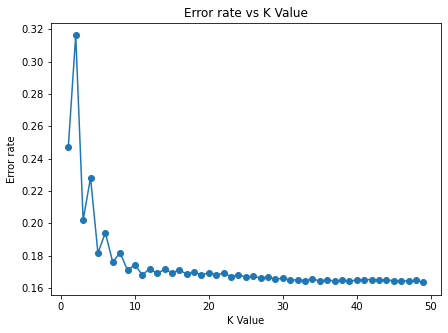

In [439]:
# figure = plt.figure(figsize=(7,5))
# plt.plot(np.arange(1,50), error_rate, marker='o')
# plt.title('Error rate vs K Value')
# plt.xlabel('K Value')
# plt.ylabel('Error rate')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [460]:
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train, y_train)
k_100_prediction = knn.predict(X_test)
print(confusion_matrix(y_test, k_100_prediction))


[[  63 1504]
 [  69 7939]]


In [450]:
print(classification_report(y_test, k_100_prediction))


              precision    recall  f1-score   support

           0       0.48      0.04      0.07      1567
           1       0.84      0.99      0.91      8008

    accuracy                           0.84      9575
   macro avg       0.66      0.52      0.49      9575
weighted avg       0.78      0.84      0.77      9575



In [458]:
knn.score(X_test, y_test)

0.8357180156657964

In [454]:
import pickle
knnPickle = open('model', 'wb')

# source, destination
pickle.dump(knn, knnPickle)

# close the file
knnPickle.close()
